<a href="https://colab.research.google.com/github/Jatchen/Machine-Learning/blob/main/0121_452_hw2_Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.sandbox.stats.multicomp import multipletests
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# 1
# Load the Breast Cancer Dataset
data = pd.read_csv("/content/drive/MyDrive/Cancer.csv")
print(data)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [69]:
#Preprocess the data remove null column
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

# Check for the missing values
missing = data.isnull().sum()
print("Missing Values Each Column = \n", missing)

Missing Values Each Column = 
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


# Data Exploration and Visualization







<ipython-input-5-c24dd8b0f32b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=False, fmt=".2f", cmap='viridis')


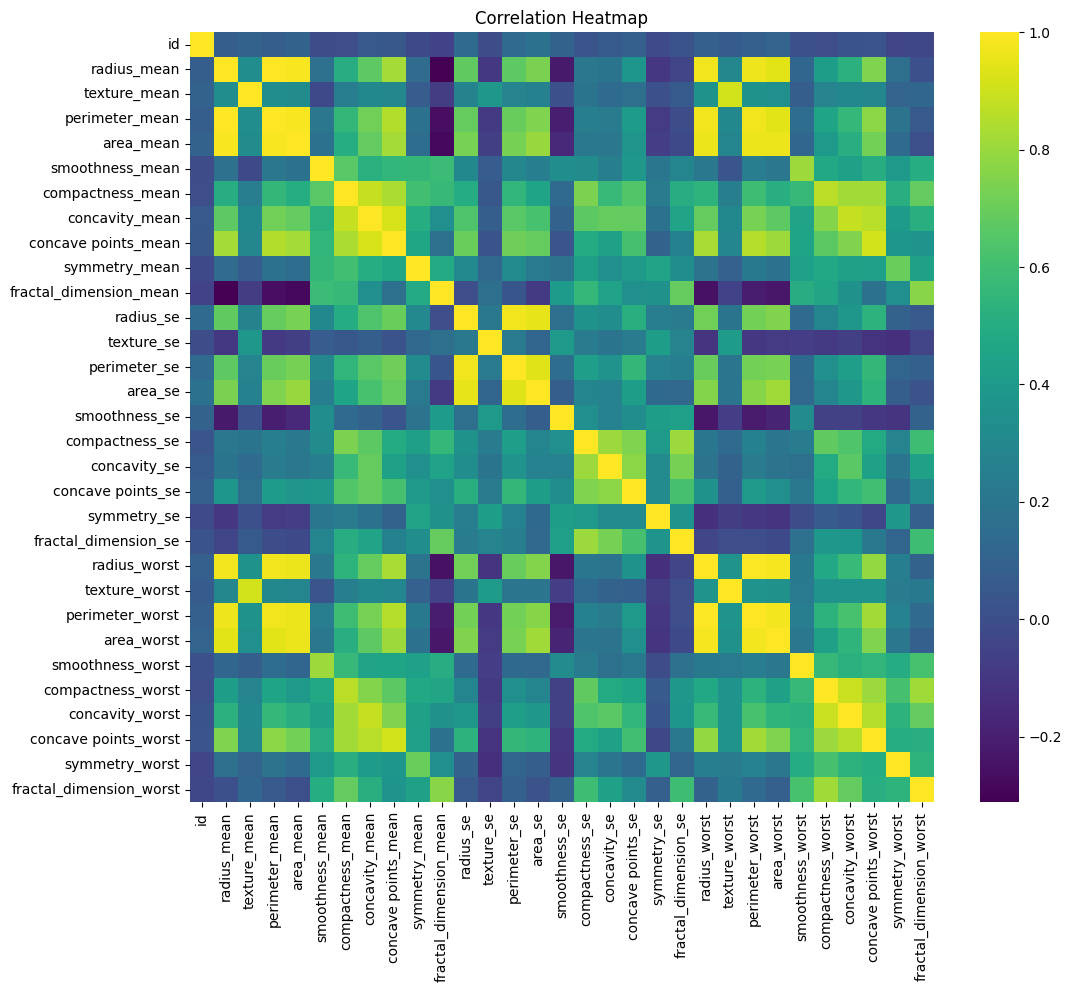

In [5]:
# Correlation matrix heatmap without annotations
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=False, fmt=".2f", cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

insight: The first plot I created is heatmap, showing the correlation between different variables. It's useful to detect the multicolinearity for the model building. For example, it shows a very high positive correlation (close to 1) between perimeter_mean and radius_mean, showing that as the average size of the tumor increases in terms of radius, the perimeter also increases as well. This relationship is intuitive as both are measures of tumor size.

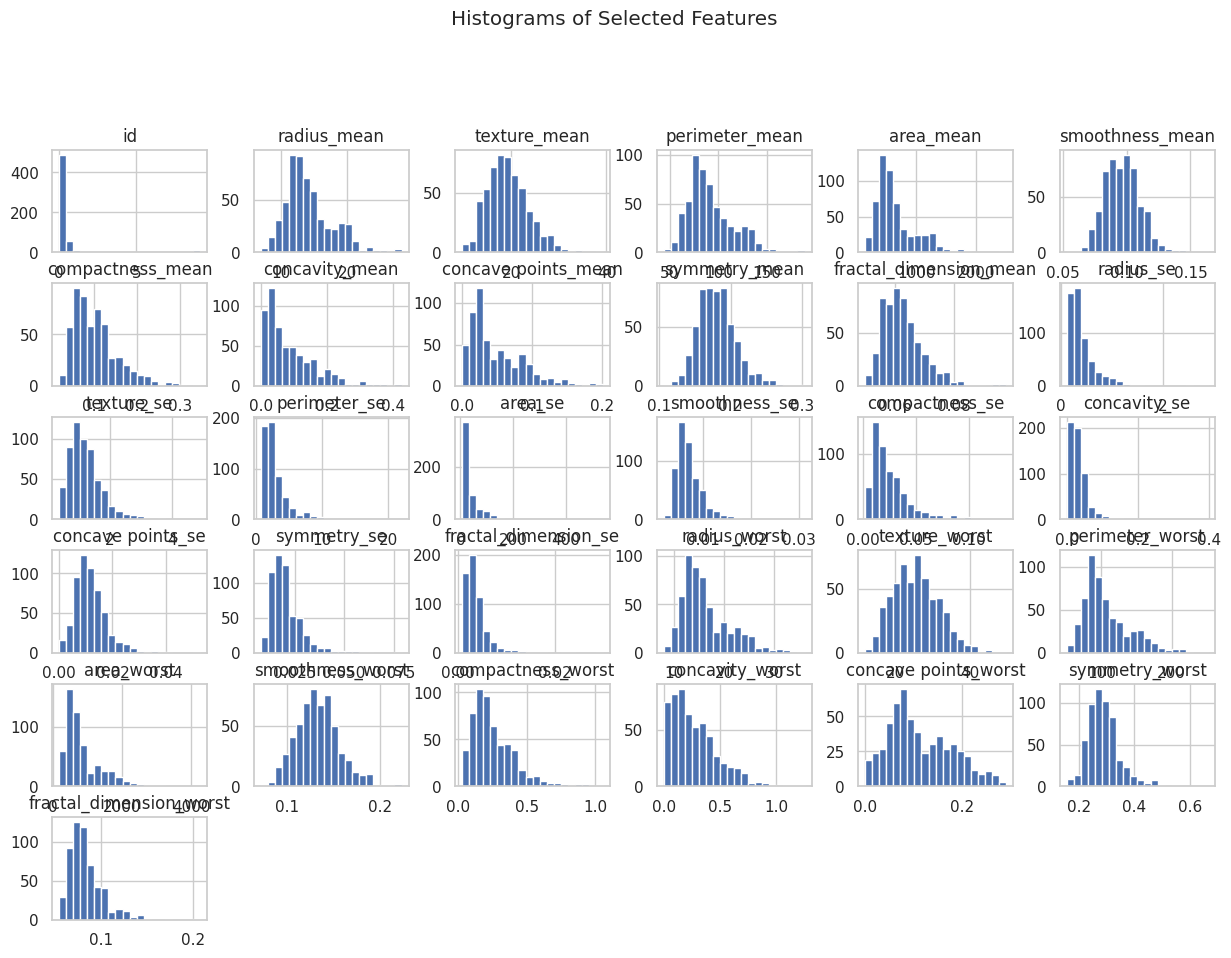

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot histograms for each feature
data.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Selected Features', y=1.02)
plt.show()

insight:
Then I create these to see the distribution among different variables. I noticed some variable exits skewness may affect statistic test for parameter significant and the rate of errors in types I and II. Some distribution worth attention, like Radius Mean. The distribution is slightly right-skewed, which shows that most tumors have a smaller radius.

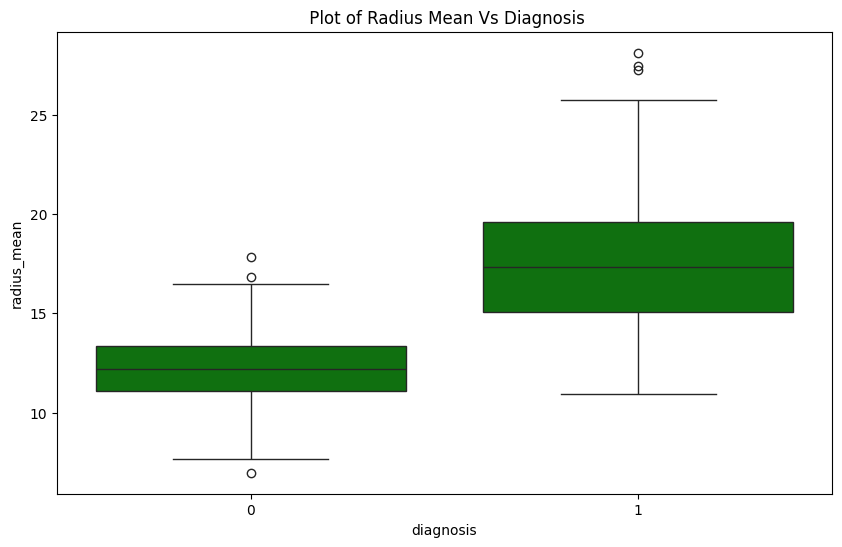

In [66]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='diagnosis', y='radius_mean', color ="green", data=data)
plt.title(' Plot of Radius Mean Vs Diagnosis')
plt.show()

INSIGHTS:

Since the dependent variable is binary, it's important to see the distribution for one variable among different outcomes. The box plot of the "Radius Mean" attribute shows that the malignant tumors (M) generally exhibit larger maximum radius values compared to benign tumors(B), implying that a greater "Radius Mean" is a potential indicator of malignancy. It also suggests no perfect seperation for this variable.

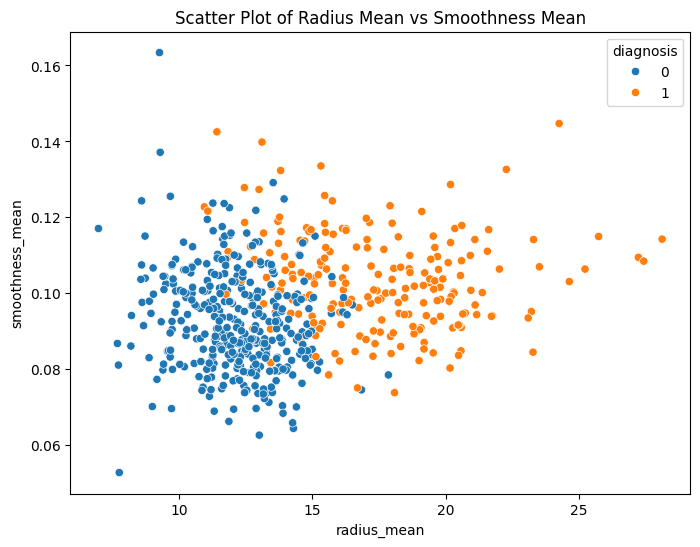

In [65]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='radius_mean', y='smoothness_mean', hue='diagnosis', data=data)
plt.title('Scatter Plot of Radius Mean vs Smoothness Mean')
plt.show()

INSIGHTS:
Besides the distribution for one variable among different outcomes, the scatter plot can also show the relationship between different variables. For example,  it shows a clear difference between benign and malignant tumors based on radius and smoothness mean. Larger values of "radius_mean" seem to be associated with a diagnosis result of 1, whereas smaller values of "radius_mean" are associated with a diagnosis result of 0.Also, there is some overlap of data points for both diagnostic results in certain areas, indicating that using only the values of "radius_mean" and "smoothness_mean" might not be sufficient to distinguish the diagnosis outcomes accurately.

# Logistic Regression Model Development

In [70]:
# Dropping id column
data = data.drop(columns=['id'])

# Encoding diagnosis variable as dummy
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Create the x & y variabes for regression
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [72]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# Scaling the variables before using in the model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Development
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Generate predictions on the test set
y_pred = logistic_model.predict(X_test_scaled)

# Create Coefficients and Intercept dataframe
coefficients = pd.DataFrame(logistic_model.coef_[0], index=X.columns, columns=['Coefficient'])
intercept = logistic_model.intercept_[0]

# Displaying the results
print("Coefficients:")
print(coefficients)
print(f"\nIntercept: {intercept}\n")

Coefficients:
                         Coefficient
radius_mean                 0.427014
texture_mean                0.425267
perimeter_mean              0.411193
area_mean                   0.455724
smoothness_mean             0.194029
compactness_mean           -0.316468
concavity_mean              0.783552
concave points_mean         0.842088
symmetry_mean              -0.208371
fractal_dimension_mean     -0.264117
radius_se                   1.115630
texture_se                 -0.089475
perimeter_se                0.645635
area_se                     0.803050
smoothness_se               0.195005
compactness_se             -0.894109
concavity_se                0.100368
concave points_se           0.456660
symmetry_se                -0.131483
fractal_dimension_se       -0.731449
radius_worst                1.087133
texture_worst               1.031715
perimeter_worst             0.942366
area_worst                  1.015267
smoothness_worst            0.581969
compactness_worst       

Steps taken for logistic regression model:
1. we encode the 'diagnose' column by converting categorical data into numerical format for future model building.
2. we split the dataset into the training and testing subset by the ration of 8:2.
3. we use Z-score to normalize the feature due to two reasons. First, it's common to use gradient descent to minimize the loss in logistic regression. Gradient descent are sensitive to the scale of features and normalization can speed up the convergence of gradient descent. Second, normalizing featurescan improve the interpretability of the machine learning model by ensuring each feature contributes on a similar scale.

# Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [73]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# RMSE (Root Mean Square Error)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

Accuracy: 0.9736842105263158
RMSE: 0.16222142113076254
R-squared: 0.8869047619047619


Insights:
1. Accuracy means the proportion of true results to total cases examined.  97.36% suggests that it correctly identifies cancer as malignant or benign 97.36% of the time.
2. R-squared and RMSE are to test how well independent variable can explain the variability of dependent variable in linear regression model. They are not commonly used in classification. However, 0.88 does suggest a good fit.

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:


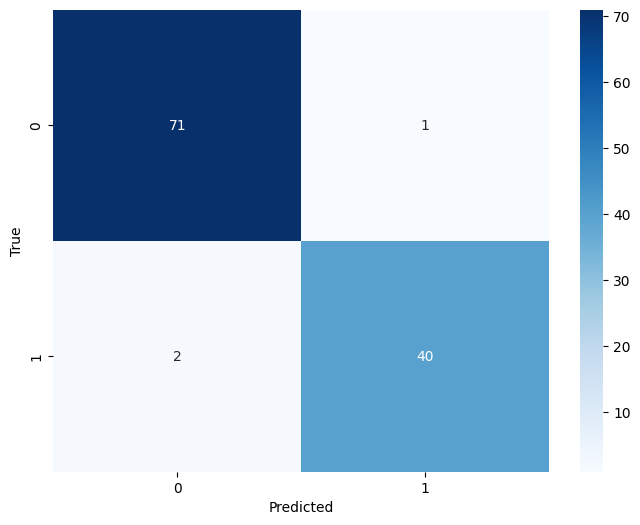

In [27]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# RMSE (Root Mean Square Error)
rmse = sqrt(mean_squared_error(y_test, y_pred))

# R-squared
r_squared = r2_score(y_test, y_pred)

# Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Insight: The Classification Report and Confusion Martix give more detailed results based on different outcomes. Because it is medical case, it will cause severe ourcome if we don't recognize the true patient. I highly focus on recall rate, which stands for the ratio of true positive predictions to the total actual positives (the sum of true positives and false negatives). For class 0, the recall is 0.99, indicating that the model correctly identified 99% of all actual benign cases. For class 1, the recall is 0.95, meaning it correctly identified 95% of all actual malignant cases.


# Testing Interactions Between Features

Discuss issues that occur when using a linear regression model to predict binary outcomes:
- Issues that occur when we use a linear regression model for predicting binary outcomes is the linear regression model assumes the relationship between our independent variables and dependent variables is continuous and linear, meanwhile for binary it will not be continuous and linear. Output that we have here could not be interpreted as probabilities. The model would most likely predict the value out range between 0-1, which will be problematic to us and meaningless.

In [31]:
# Interaction with categorical variable

import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode 'diagnosis' as a dummy variable
data['diagnosis_dummy'] = pd.get_dummies(data['diagnosis'], drop_first=True)

# Create interaction terms
data['diagnosis_dummy_radius_interaction'] = data['diagnosis_dummy'] * data['radius_mean']
data['diagnosis_dummy_texture_interaction'] = data['diagnosis_dummy'] * data['texture_mean']

# Creating x & y variables for regression
X = data[['radius_mean', 'texture_mean', 'diagnosis_dummy_radius_interaction', 'diagnosis_dummy_texture_interaction']]
y = data['diagnosis']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# Scaling the features before using in the model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Add a constant term
X_train_scaled_df = sm.add_constant(X_train_scaled_df)

# Reset the index of y_train to align it with X_train_scaled_df
y_train = y_train.reset_index(drop=True)

# Fit a linear regression model
linear_model = sm.OLS(y_train, X_train_scaled_df)
linear_model_results = linear_model.fit()

# Display the summary
print(linear_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     6962.
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:42:26   Log-Likelihood:                 626.94
No. Observations:                 455   AIC:                            -1244.
Df Residuals:                     450   BIC:                            -1223.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [32]:
# Compare the result without Interaction
# Creating x & y variables for regression
X = data[['radius_mean', 'texture_mean']]
y = data['diagnosis']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# Scaling the features before using in the model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Add a constant term
X_train_scaled_df = sm.add_constant(X_train_scaled_df)

# Reset the index of y_train to align it with X_train_scaled_df
y_train = y_train.reset_index(drop=True)

# Fit a linear regression model
linear_model = sm.OLS(y_train, X_train_scaled_df)
linear_model_results = linear_model.fit()

# Display the summary
print(linear_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     331.4
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           2.44e-89
Time:                        01:45:28   Log-Likelihood:                -109.82
No. Observations:                 455   AIC:                             225.6
Df Residuals:                     452   BIC:                             238.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3736      0.014     25.788   

Insight: Discuss the influence of these interactions on the model. Describe how to interpret these interactions and their implications for understanding the data.

Checking interactions in our model aims to understand how the relationship between our predictor variables and the diagnosis changes when we combine together the effect.

1. The sign for coefficient reverse after having interaction.
2. R square improved after having interaction. It makes sense because the linear model has more variables.

However, since we use the OLS for predicting binary results, the interpretation for these interactions is problematic. We need to use logistic regression instead to appropriately predict the binary outcomes.

# Feature Selection and Cross-Validation: Full vs. Reduced Model

## create the full model

In [33]:
import statsmodels.api as sm

# Prepare the data
X = data.drop('diagnosis', axis=1)
X = sm.add_constant(X)  # Add a constant (intercept) to the predictors
y = data['diagnosis']

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit_regularized(method='l1')

# Summarize the model
summary_subset = result.summary()
summary_subset

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


Optimization terminated successfully    (Exit mode 0)
            Current function value: 7.945433550244865e-09
            Iterations: 48
            Function evaluations: 66
            Gradient evaluations: 48


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      532
Method:                           MLE   Df Model:                           36
Date:                Thu, 25 Jan 2024   Pseudo R-squ.:                   1.000
Time:                        01:48:47   Log-Likelihood:            -4.5210e-06
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                1.171e-134
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.0398   5.33e+07  -7.47e-10      1.000   -1.04e+08    1.04e+08
radius_mean                               -0.2273   1.86e+07  -1.22e-08      1.000   -3.64e+07    3.64e+07
texture_mean                              -0.3244   5.65e+05  -5.74e-07      1.000   -1.11e+06    1.11e+06
perimeter_mean                            -1.1425   1.91e+06  -5.98e-07      1.000   -3.75e+06    3.75e+06
area_mean                                  0.1061   1.03e+05   1.03e-06      1.000   -2.01e+05    2.01e+05
smoothness_mean                           -0.0043   9.76e+07  -4.38e-11      1.000   -1.91e+08    1.91e+08
compactness_mean                          -0.0087   4.46e+06  -1.95e-09      1.000   -8.73e+06    8.73e+06
concavity_mean                            -0.0072   4.19e+06  -1.71e-09      1.000   -8.21e+06    8.21e+06
concave points_mean                       -0.0016   1.11e+07  -1.43e-10      1.000   -2.17e+07    2.17e+07
symmetry_mean                             -0.0116   4.24e+06  -2.74e-09      1.000   -8.32e+06    8.32e+06
fractal_dimension_mean                    -0.0044   3.04e+07  -1.45e-10      1.000   -5.96e+07    5.96e+07
radius_se                                 -0.0352   3.87e+06  -9.09e-09      1.000   -7.58e+06    7.58e+06
texture_se                                -0.0946   3.55e+05  -2.67e-07      1.000   -6.95e+05    6.95e+05
perimeter_se                              -0.1772   1.74e+05  -1.02e-06      1.000    -3.4e+05     3.4e+05
area_se                                    0.2282   3.78e+04   6.04e-06      1.000   -7.41e+04    7.41e+04
smoothness_se                             -0.0015   5.63e+07  -2.67e-11      1.000    -1.1e+08     1.1e+08
compactness_se                            -0.0039   1.31e+07  -2.95e-10      1.000   -2.57e+07    2.57e+07
concavity_se                              -0.0052   1.75e+07  -2.95e-10      1.000   -3.43e+07    3.43e+07
concave points_se                         -0.0006   4.69e+07  -1.23e-11      1.000   -9.18e+07    9.18e+07
symmetry_se                               -0.0027   1.67e+07  -1.64e-10      1.000   -3.27e+07    3.27e+07
fractal_dimension_se                      -0.0009   8.86e+07  -9.65e-12      1.000   -1.74e+08    1.74e+08
radius_worst                              -0.1658   3.49e+05  -4.75e-07      1.000   -6.84e+05    6.84e+05
texture_worst                              1.0179   3.91e+04   2.61e-05      1.000   -7.65e+04    7.65e+04
perimeter_worst                           -0.6473   1.49e+04  -4.35e-05      1.000   -2.91e+04    2.91e+04
area_worst                                 0.0585   4504.411    1.3e-05      1.000   -8828.426    8828.543
smoothness_worst                          -0.0045   5.28e+06   -8.6e-10      1.000   -1.03e+07    1.03e+07
compactness_worst                          0.0077   1.06e+06   7.24e-09      1.000   -2.08e+06    2.08e+06
concavity_worst                

## create reduce model through forward selection

In [40]:

# Encoding categorical variables
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Dropping 'id' column if it exists
if 'id' in data.columns:
    data = data.drop(columns=['id'])

# Create the x & y variables for regression
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

# Scaling the variables before using in the model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled training data back to a DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant


def forward_selection(X, y, significance_level=0.05):
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    selected_variables = []

    for i in range(X.shape[1]):
        pvalues = []
        for var in X.columns:
            if var not in selected_variables:
                try:
                    test_vars = selected_variables + [var]
                    test_X = add_constant(X[test_vars])
                    model = Logit(y, test_X).fit_regularized(method='l1', disp=0)
                    pvalue = model.pvalues[var]
                    pvalues.append((var, pvalue))
                except np.linalg.LinAlgError:
                    continue

        pvalues.sort(key=lambda x: x[1])
        if pvalues and pvalues[0][1] < significance_level:
            selected_variables.append(pvalues[0][0])
        else:
            break

    return selected_variables

selected_features = forward_selection(X_train_scaled, y_train)

# Fit the logistic regression model using the selected features
if not selected_features:
    raise ValueError("No features selected. Adjust the significance level or check the data.")

X_train_selected = X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [41]:
print(selected_features)

['concavity_mean', 'concave points_mean', 'texture_worst', 'area_worst', 'area_mean']


## perform out of sample predict and 10 folds cross validation for both model

In [63]:
# the cross-validation for full model
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Create the x & y variables for regression
X = data.drop('diagnosis', axis=1)
X = sm.add_constant(X)
y = data['diagnosis']

# Define the model with intercept
logistic_model = LogisticRegression(fit_intercept=True)

# Create a pipeline
pipeline = make_pipeline(StandardScaler(), logistic_model)

# Setup the 10-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

# Define different scoring metrics
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

# Perform the 10-fold cross-validation
cv_results = cross_validate(pipeline, X, y, cv=kfold, scoring=scoring)

# Print the mean and standard deviation of each metric
print("Mean Scores:")
print(f"Mean Accuracy: {np.mean(cv_results['test_accuracy'])}")
print(f"Mean Precision: {np.mean(cv_results['test_precision'])}")
print(f"Mean Recall: {np.mean(cv_results['test_recall'])}")
print(f"Mean F1 Score: {np.mean(cv_results['test_f1'])}")

Mean Scores:
Mean Accuracy: 0.9718671679197994
Mean Precision: 0.9692487922705315
Mean Recall: 0.9571091178306146
Mean F1 Score: 0.9621510943871192


In [64]:
# the cross-validation for reduce model

# Create the x & y variables for regression
X = data[selected_features]
X = sm.add_constant(X)
y = data['diagnosis']

# Define the model
logistic_model = LogisticRegression()

# Create a pipeline
pipeline = make_pipeline(StandardScaler(), logistic_model)

# Setup the 10-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

# Define different scoring metrics
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

# Perform the 10-fold cross-validation
cv_results = cross_validate(pipeline, X, y, cv=kfold, scoring=scoring)



# Print the mean and standard deviation of each metric
print("Mean Scores:")
print(f"Mean Accuracy: {np.mean(cv_results['test_accuracy'])}")
print(f"Mean Precision: {np.mean(cv_results['test_precision'])}")
print(f"Mean Recall: {np.mean(cv_results['test_recall'])}")
print(f"Mean F1 Score: {np.mean(cv_results['test_f1'])}")

Mean Scores:
Mean Accuracy: 0.9613408521303256
Mean Precision: 0.9656989459815547
Mean Recall: 0.9357562631876132
Mean F1 Score: 0.9490155715023179


Insights about comparision:
1. The Accuracy and precision are almost the same for both models, showing good performance.
2. The recall and F1 score: full model both have superior outcome. Because it is medical setting, high recall rate means better ability to disscovery true patient. So higher recall suggests a better performance here.

Overall, the Full Model slightly outperforms the Reduced Model across all major metrics, especially in terms of Recall and F1 Score. This means the Full Model is superior in terms of both accuracy and reliability. However, more complex model means the higher probability of overfitting and poor generalization.

In [75]:
%%shell
jupyter nbconvert --to html "/content/0121_452_hw2_Logistic.ipynb"

[NbConvertApp] Converting notebook /content/0121_452_hw2_Logistic.ipynb to html
[NbConvertApp] Writing 1195411 bytes to /content/0121_452_hw2_Logistic.html
